## Johnsons Algorithmus fuer VCol

In [1]:
import networkx as nx
import random
import matplotlib.pyplot as plt
import math
import time
import pandas as pd
data = []

In [2]:
"""
    Visualizes colored graphs:
        args:   G : a graph as nx.Graph Object
                colors: number of required colors (max 20 colors accepted)
                coloring: dict with colordistribution with nodes as keys and integers as values
                pos: nx.spring_layout(G)
"""
def visualize_graph(G: nx.Graph, colors=0, coloring=None, pos=None):
    color = {0: 'b', 1: 'g', 2: 'r', 3: 'c', 4: 'm', 5: 'y', 6: 'k', 7: 'aqua', 8: 'gold', 9: 'silver', 10: 'plum',
              11: 'purple', 12: 'ivory', 13: 'brown', 14: 'azure',15: 'lime',16: 'navy', 17: 'olive', 18: 'tan', 19: 'teal', 20: 'grey'}
    plt.figure(figsize=(12,6))
    nx.draw_networkx(G,pos=pos)
    for i in range(colors):
        c = []
        for key, value in coloring.items():
            if value == i:
                c.append(key)
        sub = G.subgraph(c)
        nx.draw_networkx(sub,pos=pos, node_color= color[i])
    plt.box(None)
    plt.show()

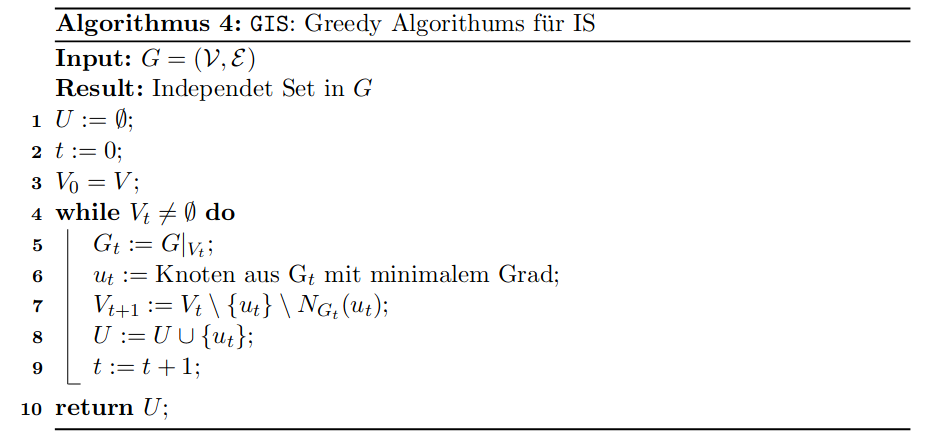

In [3]:
def greedy_independent_set(G: nx.graph):
    G = G.copy()
    U = list()
    while list(G.nodes) != []:
        ut = sorted(list(G.degree), key=lambda tup: tup[1])[0][0]
        for neighbor in list(G.neighbors(ut)):
            G.remove_node(neighbor)
        G.remove_node(ut)
        U.append(ut)
    return set(U)

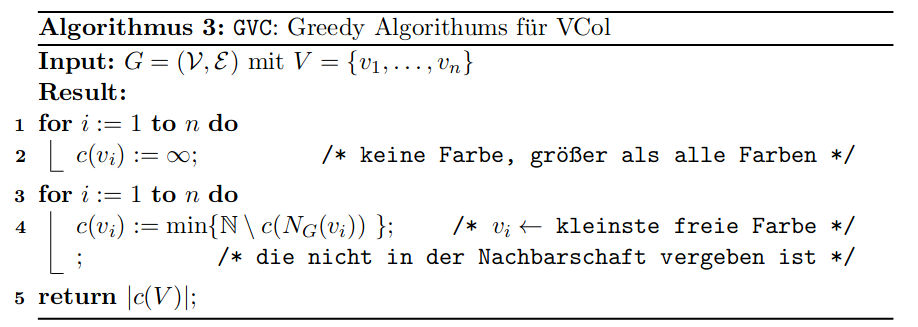

In [4]:
def greedy_vcol(G: nx.graph):
    colors = set()
    coloring = {}
    for node in G.nodes:
        coloring[node] = math.inf
    for node in G.nodes:
        choose = colors.copy().difference(set([coloring[neighbor] for neighbor in G.neighbors(node) if neighbor in coloring.keys()]))
        new_color = -1
        if choose == set(): 
            new_color = len(colors)
            colors.add(new_color)
        else: new_color = min(choose)
        coloring[node] = new_color
    nx.set_node_attributes(G, coloring,name='color')
    return len(colors), coloring


### Algorithm
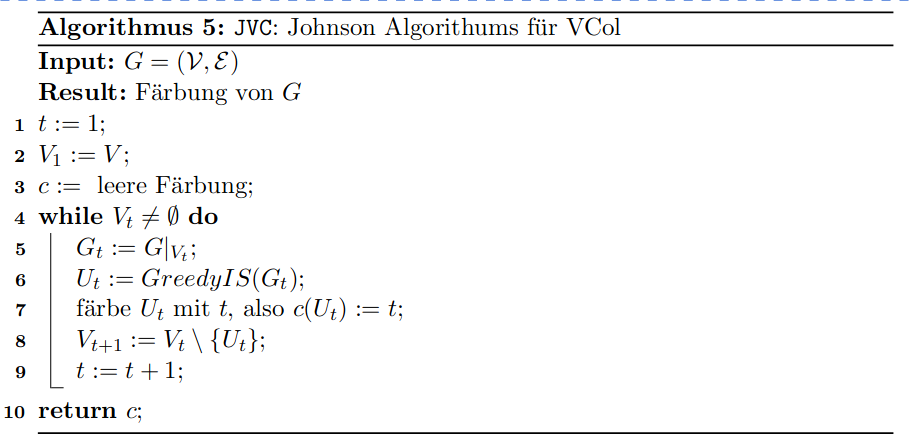

In [5]:
def johnson_vcol(G: nx.graph):
    H = G
    G = G.copy()
    colors = set()
    coloring = dict()
    t = 1
    while list(G.nodes) != []:
        U = greedy_independent_set(G)
        for node in U:
            coloring[node] = t
            colors.add(t)
            G.remove_node(node)
        t += 1
    nx.set_node_attributes(H, coloring, name='color')
    return len(colors), coloring

### Analysis

In [6]:
def create_random_network(max_nodes: int)-> nx.Graph:
    n = random.randint(3,max_nodes)
    nodes = [node for node in range(n)]
    return nx.Graph([tuple(random.sample(nodes,2)) for m in range(random.randint(1,n**2))])

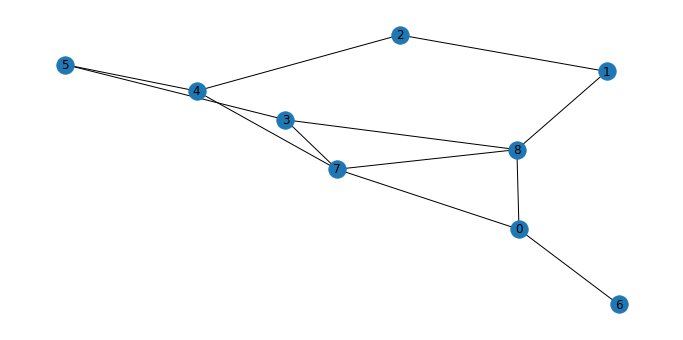

Graph with: 9 nodes, and: 12 edges 


In [7]:
G = create_random_network(30)
pos=nx.spring_layout(G)
visualize_graph(G, pos=pos)
print(f'Graph with: {len(G.nodes)} nodes, and: {len(G.edges)} edges ')

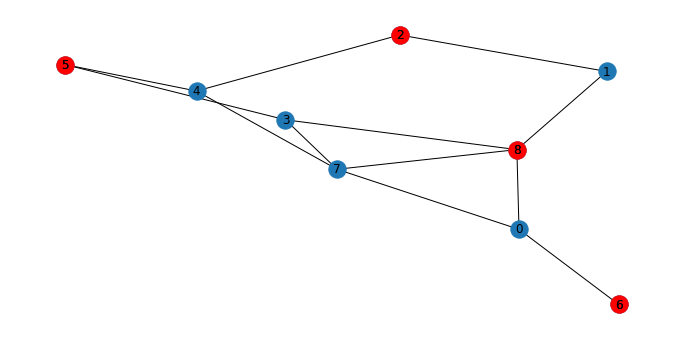

In [8]:
c = greedy_independent_set(G)
sub=G.subgraph(c)
plt.figure(figsize=(12,6))
nx.draw_networkx(G,pos=pos)
nx.draw_networkx(sub,pos=pos, node_color='r')
plt.box(None)
plt.show()

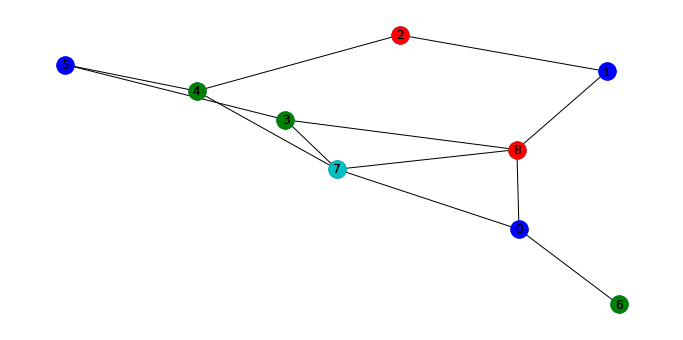

Graph colored with 4 colors using greedy algorithm


In [9]:
colors, coloring = greedy_vcol(G)
visualize_graph(G,colors=colors,coloring=coloring, pos=pos)
print(f'Graph colored with {colors} colors using greedy algorithm')

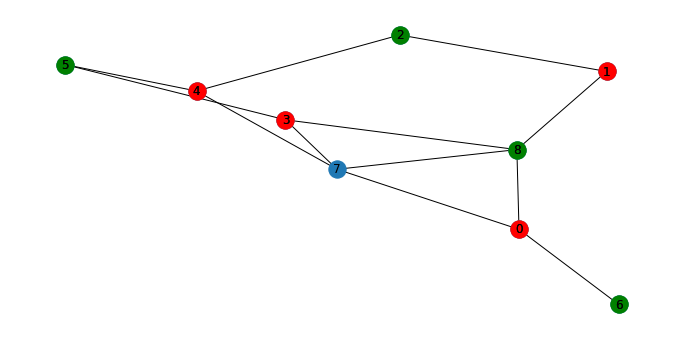

Graph colored with 3 colors using johnsons algorithm


In [10]:
colors, coloring = johnson_vcol(G)
visualize_graph(G,colors,coloring,pos)
print(f'Graph colored with {colors} colors using johnsons algorithm')

In [11]:
#Testdaten erzeugen:
for test in range(200):
    G = create_random_network(100)
    V = len(G.nodes)
    E = len(G.edges)
    greedy_time = time.time()
    greedy_res = greedy_vcol(G)[0]
    greedy_time = time.time() - greedy_time 
    johnson_time = time.time()
    johnson_result = johnson_vcol(G)[0]
    johnson_time = time.time() - johnson_time
    nx_greedy = len(set(nx.greedy_color(G).values()))
    data.append((V, E, greedy_time, greedy_res, johnson_result, nx_greedy, johnson_time))
    
    

In [12]:
df = pd.DataFrame(data, columns=['|V|', '|E|', 'Time Greedy Algorithm', 'Result Greedy Algorithm', 'Result Johnson Algorithm', 'Result nx built in', 'Time Johnson Algorithm'])
df

,|V|,|E|,Time Greedy Algorithm,Result Greedy Algorithm,Result Johnson Algorithm,Result nx built in,Time Johnson Algorithm
0,91,2594,0.000925,25,23,23,0.071260
1,51,767,0.000207,16,16,14,0.005591
2,34,194,0.000087,8,8,7,0.001110
3,47,757,0.000193,16,16,16,0.005331
4,41,684,0.000176,22,18,18,0.005752
...,...,...,...,...,...,...,...
195,57,1104,0.000271,19,19,18,0.007547
196,16,74,0.000041,7,7,6,0.000422
197,41,661,0.000175,18,18,17,0.004473
198,23,208,0.000074,11,11,11,0.001232
